# Homework 05 - Sentiment analysis 

_Goal_ :

**We want to perform sentiment analysis on Hillary Clinton's emails to summarize the perception of the mentioned countries.**

_Tools_ :

**The main (new) tools used are :**

* pycountry
* nltk

_Contents_ :

* [1 - Loading data](#1---Loading-data)
* [2 - Finding countries perception](#2---Finding-countries-perception)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# HW5 specific ;)
import nltk
import time
import collections
import pycountry
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# 1 - Loading data

In [2]:
mails_df = pd.read_csv('hillary-clinton-emails/Emails.csv')
print(mails_df.shape)
mails_df.head()

(7945, 22)


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# 2 - Finding countries perception

In this assignment, we are interested in the *perception* of the countries.

This means that first, we have to find the emails that mentions one ore several countries. For those emails, we will perform sentiment analysis and store the results. We also have to keep track of which email mentions which country.

## Finding mentions of countries

First we want to find the emails mentioning countries. For this, we build a dictionary __`mail_dict`__ with:  
* keys : country names
* items : list of mails related to that country

In [3]:
# we need to set the enconding to work on linux cluster - as the notebook was made on mac os
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")

In [4]:
mail_dict = dict()

# Iterate over countries and emails, and store the results in our dict
start = time.time()
for n in pycountry.countries:
    current_country_list = []
    
    for m in mails_df.ExtractedBodyText.dropna():
        if n.name in m:
            current_country_list.append(m)

    mail_dict[n.name] = current_country_list        


print('finding the emails that mentions each country took (sec):',time.time() - start)

# sorting the dictionary, by country name:
mail_dict = collections.OrderedDict(sorted(mail_dict.items()))

finding the emails that mentions each country took (sec): 2.020555019378662


We can create a dataframe summarizing this data, containing the counts of mails, per country :

In [5]:
mails_country_df =  pd.DataFrame([len(mail_dict[c]) for c in mail_dict.keys()])
mails_country_df.columns = ['mails_counts']
mails_country_df.index = mail_dict.keys()
mails_country_df.head()

,mails_counts
Afghanistan,98
Albania,2
Algeria,4
American Samoa,0
Andorra,0


...and here is the _distribution_ of number of emails, mentioning each country:

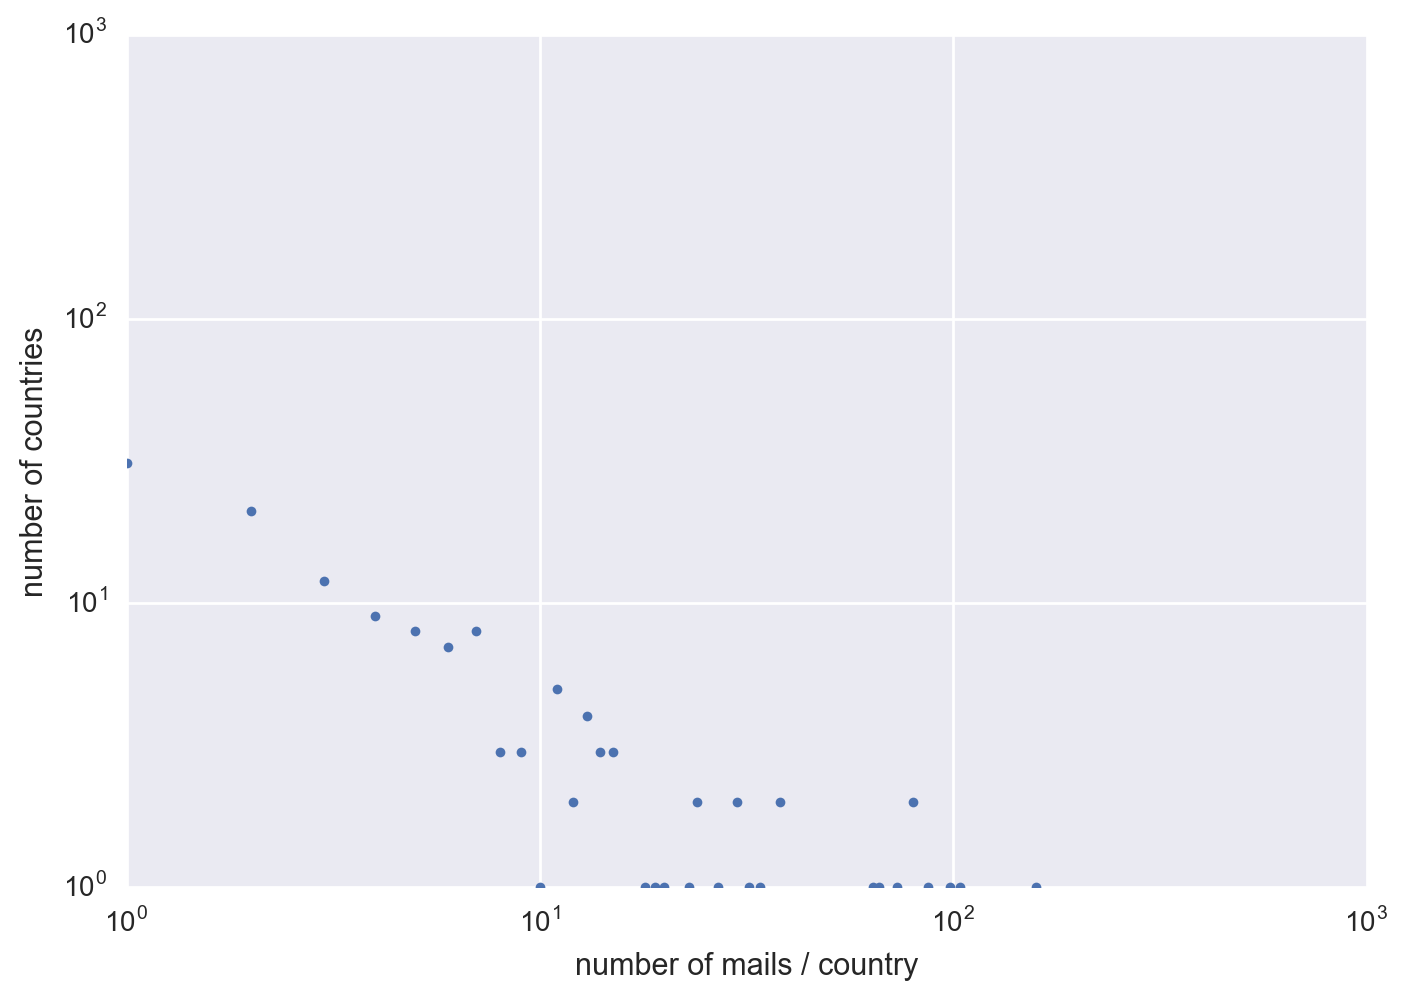

In [6]:
plt.loglog(mails_country_df.mails_counts.value_counts(),marker='.',linestyle='')
plt.xlabel('number of mails / country')
plt.ylabel('number of countries')

Now we know on how many messages we have to run sentiment analysis :

In [7]:
print('Number of mail to be processed:',mails_country_df.mails_counts.sum())
print('Total number of mails:',mails_df.shape[0])

Number of mail to be processed: 1730
Total number of mails: 7945


## Sentiment analysis

In this part, we actually perform the sentiment analysis and build another dictionary __`senti_dict`__ storing the results, with:  
* keys   : country names
* values : polarity scores for each country

First we define a helper function that, given a country, computes the sentiment analysis on all the mails mentioning it.

In [8]:
# Will be applied to each country :
def sent_func(n):
    # Define useful dictionary and list
    senti_dict = dict()
    current_country_list = []
    
    # Sentiment analysis
    for m in mail_dict[n]:        
        current_country_list.append(SentimentIntensityAnalyzer().polarity_scores(m))
    
    senti_dict[n] = current_country_list      
    
    return senti_dict

Sentiment analysis is costly, we can maybe parallelize :

In [14]:
import multiprocessing as mp

pool_size  = mp.cpu_count()
pool = mp.Pool(pool_size)
pool_size

48

This is a __quite long__ command, so, better to skip it and load the data from the _.csv file_ :-)

In [17]:
# %time senti_dict = pool.map(sent_func, mail_dict.keys())

# trial command, with few countryies
# %time senti_dict = pool.map(sent_func,['Albania','Bahrain','Cambodia','Cameroon','El Salvador','Finland','Ghana','Greenland'])

(Mind that the result of the computation, `senti_dict` is a _list of dictionary_, where each values of _list of dictionary_).

In [10]:
# for item in senti_dict: # senti_dict is a list - item is a dict

#     country = list(item.keys())[0]
#     country_score = 0
    
#     # Check if there is any email for that country
#     if mails_country_df.loc[country,'mails_counts'] > 0:
#         for mail in item[country]: # item[coutry] is a list - mail is a dict
#             country_score += mail['compound']

#         mails_country_df.loc[country,'score'] = country_score / mails_country_df.loc[country,'mails_counts']

As the computation is quite long, we prefer to _store the result in a file_:

In [10]:
# mails_country_df.to_csv('senti_dict.csv')
# mails_country_df.head()

## Preparing data for final plots

Now that we have all the data we need, let's __load__ back the saved file, and put it in a handy dataframe for final plots :

In [11]:
# Loading df
mails_country_df = pd.read_csv('senti_dict.csv')

# Cleaning df
mails_country_df.columns = ['name', 'mails_counts', 'score']
mails_country_df.dropna(inplace=True)
mails_country_df.sort_values('score',inplace=True)

# Output resulting df - mind that many coutry were 'lost' due to .dropna()
print(mails_country_df.shape)
mails_country_df.head()

(142, 3)


,name,mails_counts,score
42,Chad,1,-0.99360
206,South Sudan,1,-0.99080
232,United Arab Emirates,1,-0.98640
121,Latvia,2,-0.97720
134,Maldives,2,-0.97695


A first plot is the _distribution_ of average sentiment scores :

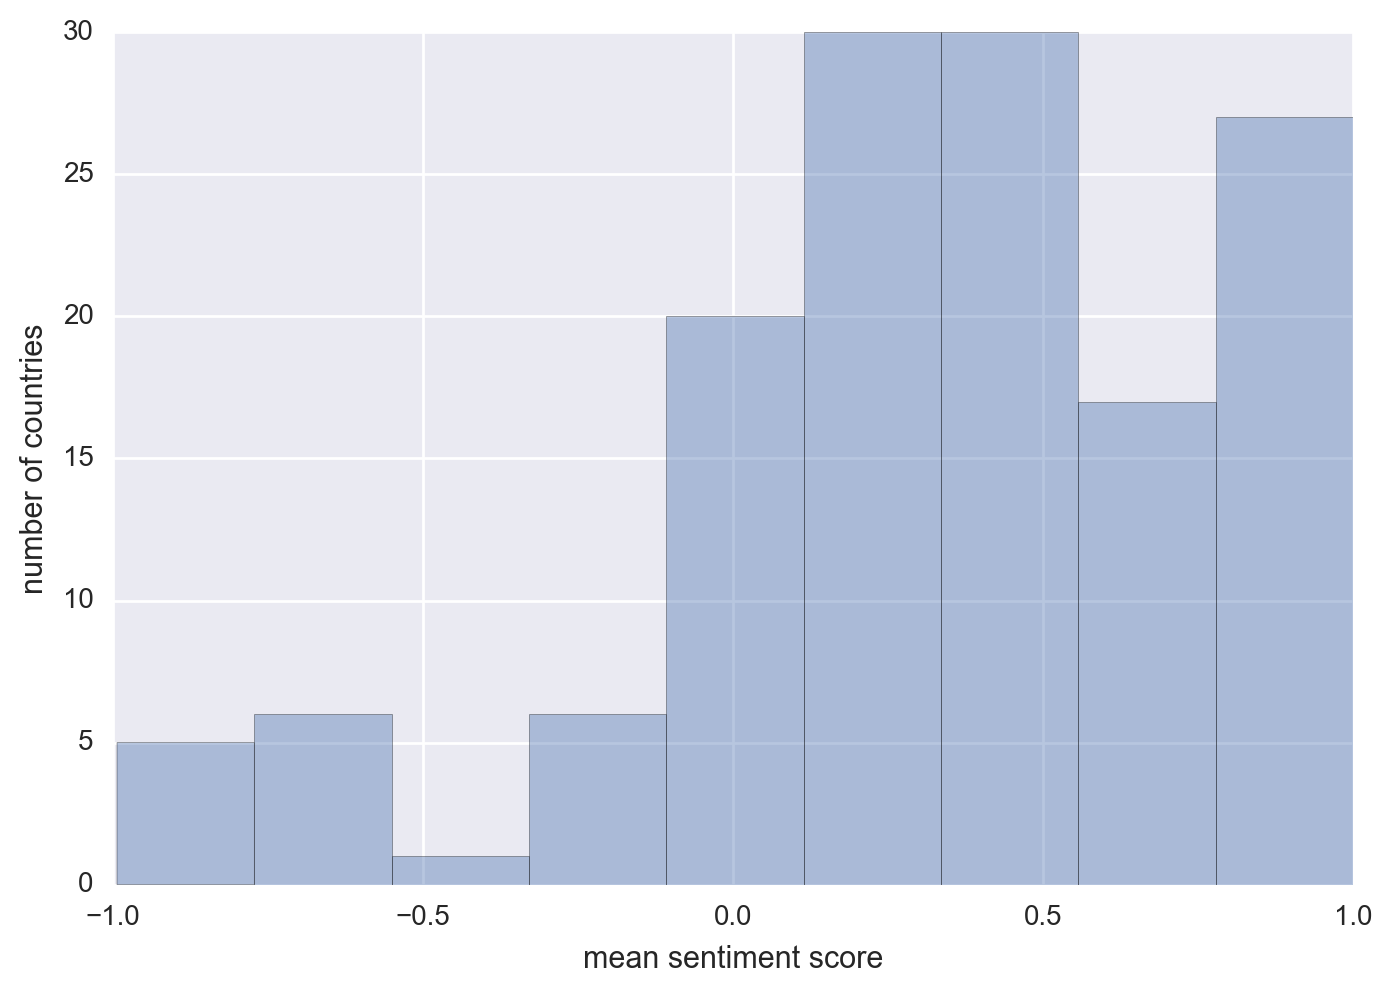

In [12]:
sns.distplot(mails_country_df.score,kde=False)
plt.ylabel('number of countries')
plt.xlabel('mean sentiment score')

Then we can plot a barplot of average sentiment scores, _only for countries with more than 20 emails_ (with colors indicating the number of emails mentioning the country) :  
(please, see again the [distribution of number of number of email](#Distribution-of-number-of-mails,-per-country:), per country, shown some cells before)

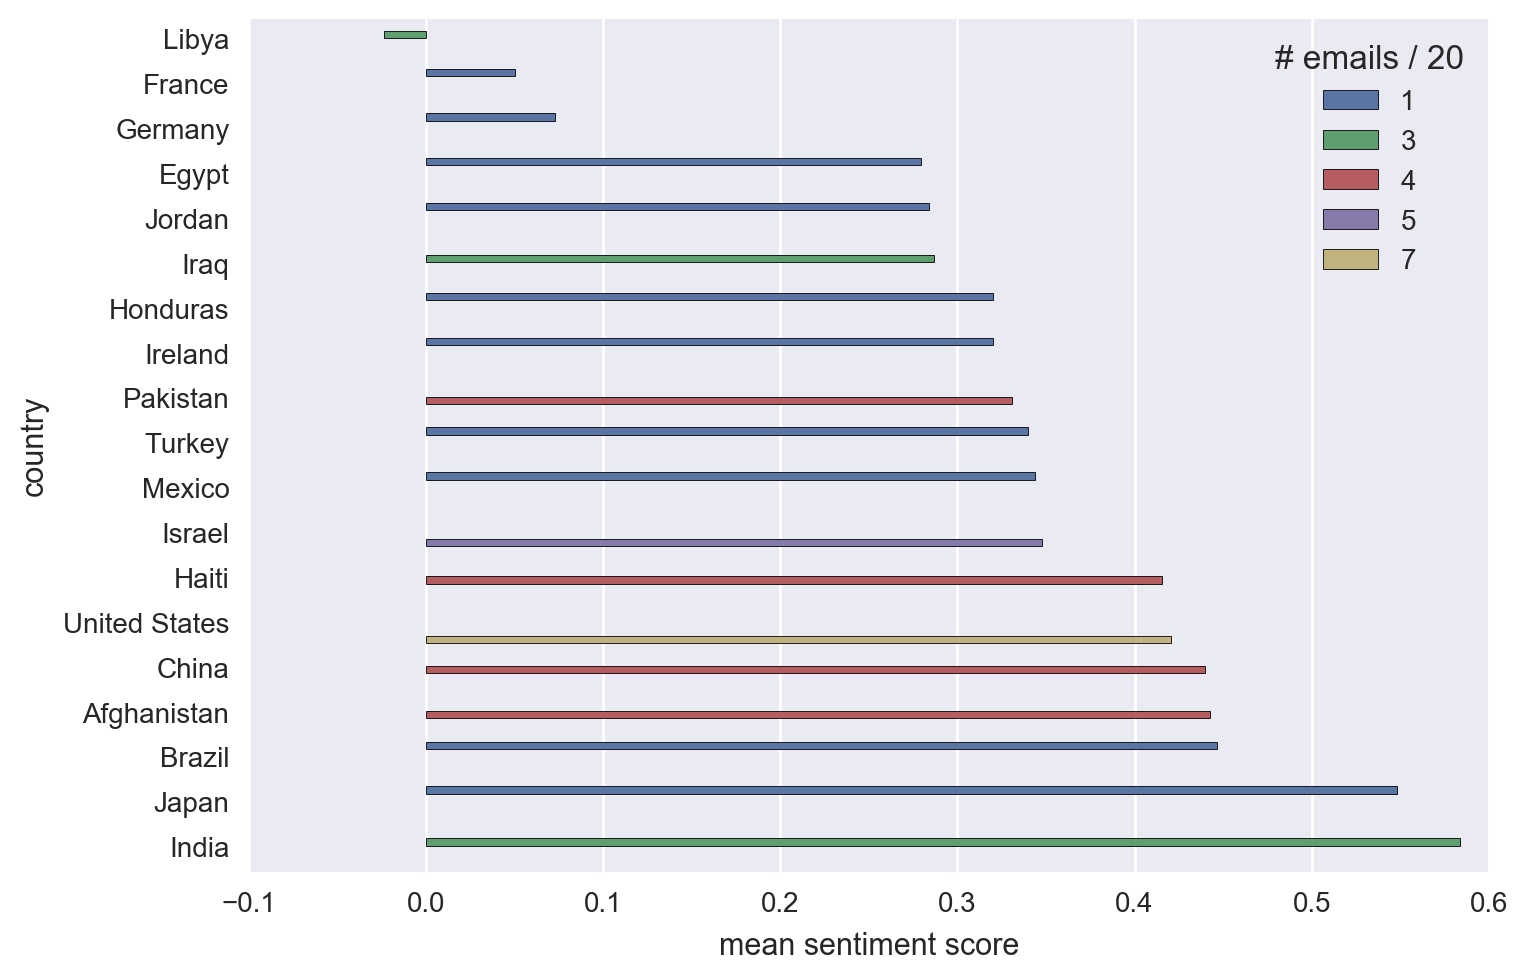

In [13]:
ax = sns.barplot(y=mails_country_df[mails_country_df.mails_counts>20].name,
                 x=mails_country_df[mails_country_df.mails_counts>20].score,
                 hue=np.floor_divide(mails_country_df[mails_country_df.mails_counts>20].mails_counts,20))
plt.ylabel('country')
plt.xlabel('mean sentiment score')
plt.legend(title='# emails / 20')

Another possible plot option is to plot the _number of emails_ vs. _country name_, and add colors to the bars to represent the _average sentiment score_. We obtain the same type of plot as [on this Kaggle page](https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries/code). 

(Note that it is rather cumbersome compared to R *;-)*)

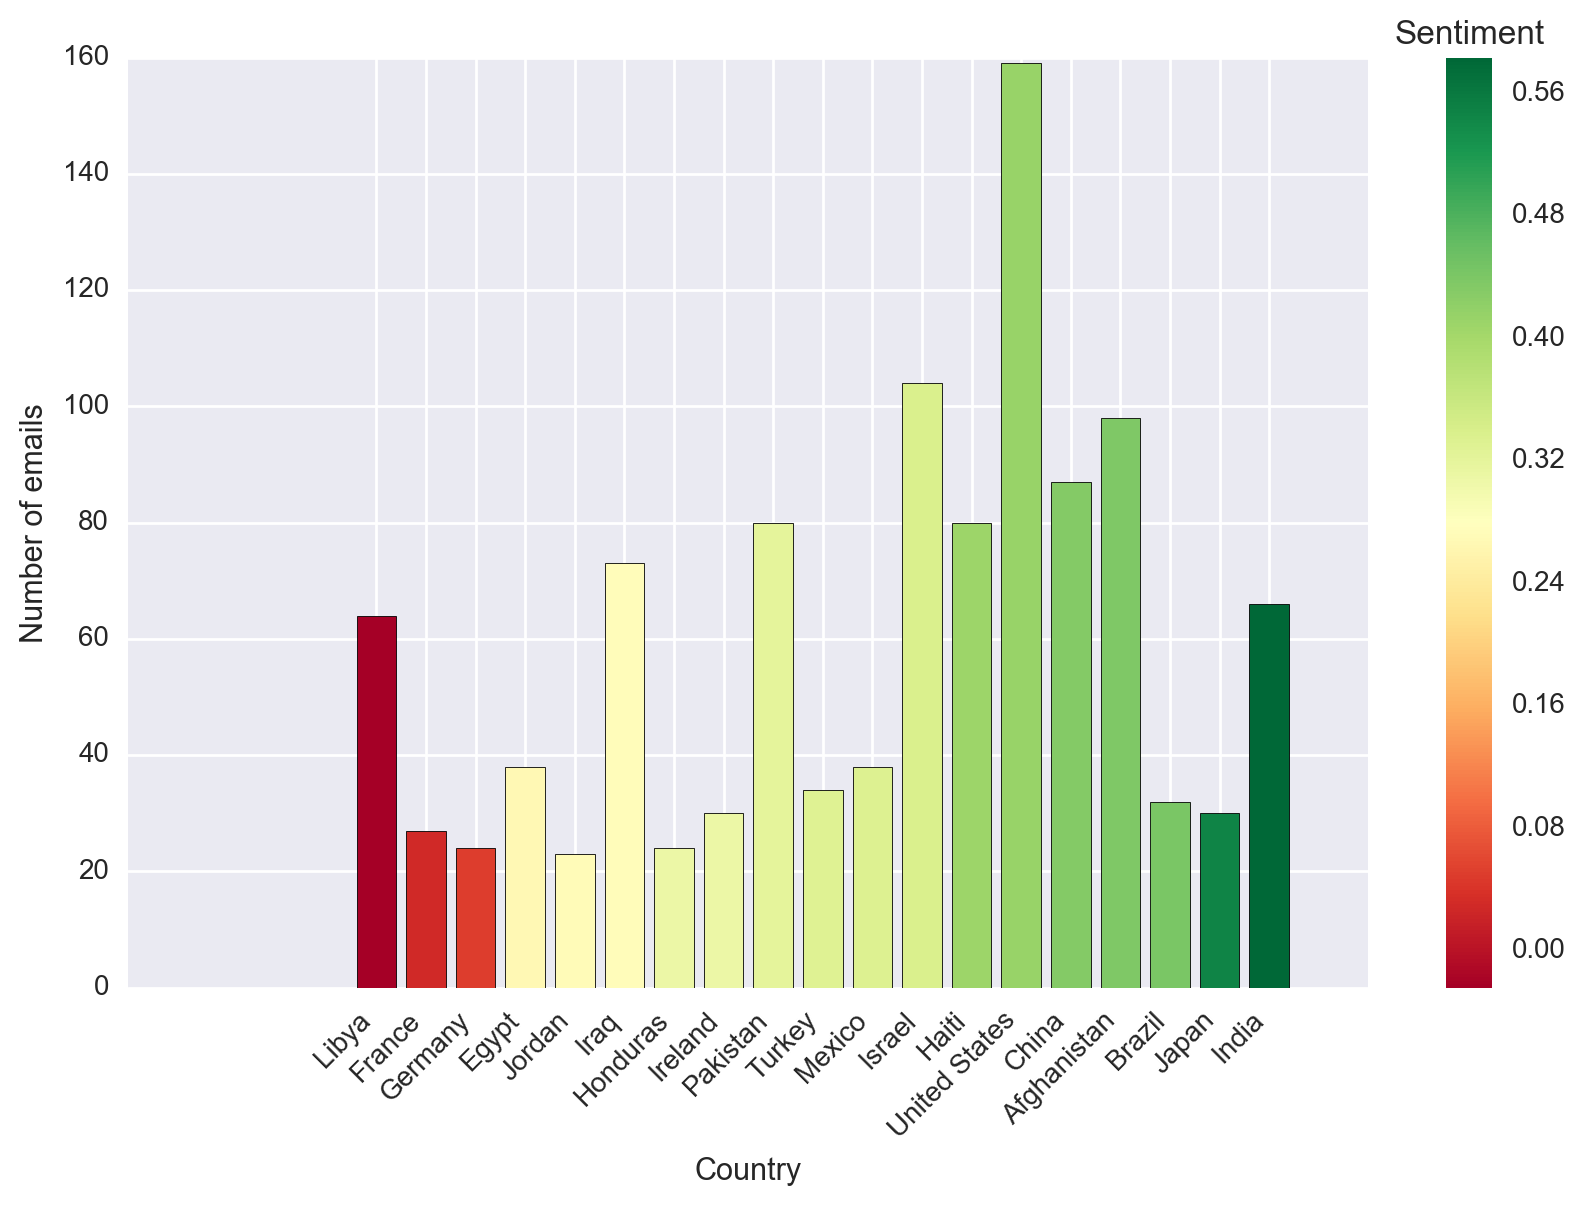

In [18]:
# Credits to Stack Overflow :
# http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
from matplotlib import cm
plt.figure(figsize=(10,6))

countries_sent = mails_country_df[mails_country_df.mails_counts>20]

# Set up colors : red to green
y = np.array(countries_sent['score'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, 
# with color indicating polarity score
plt.bar(range(countries_sent.shape[0]),
        countries_sent['mails_counts'],
        align='center',
        tick_label=countries_sent['name'],
        color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of emails")
plt.show()

## Extra step

Here we check the _possible_ presence of correlation between the _number of emails_ and the _score_, namely: __did Hillary talk more about country she likes/dislikes?__

The plot below shows that there is **no** (statistically relevant) correlation.

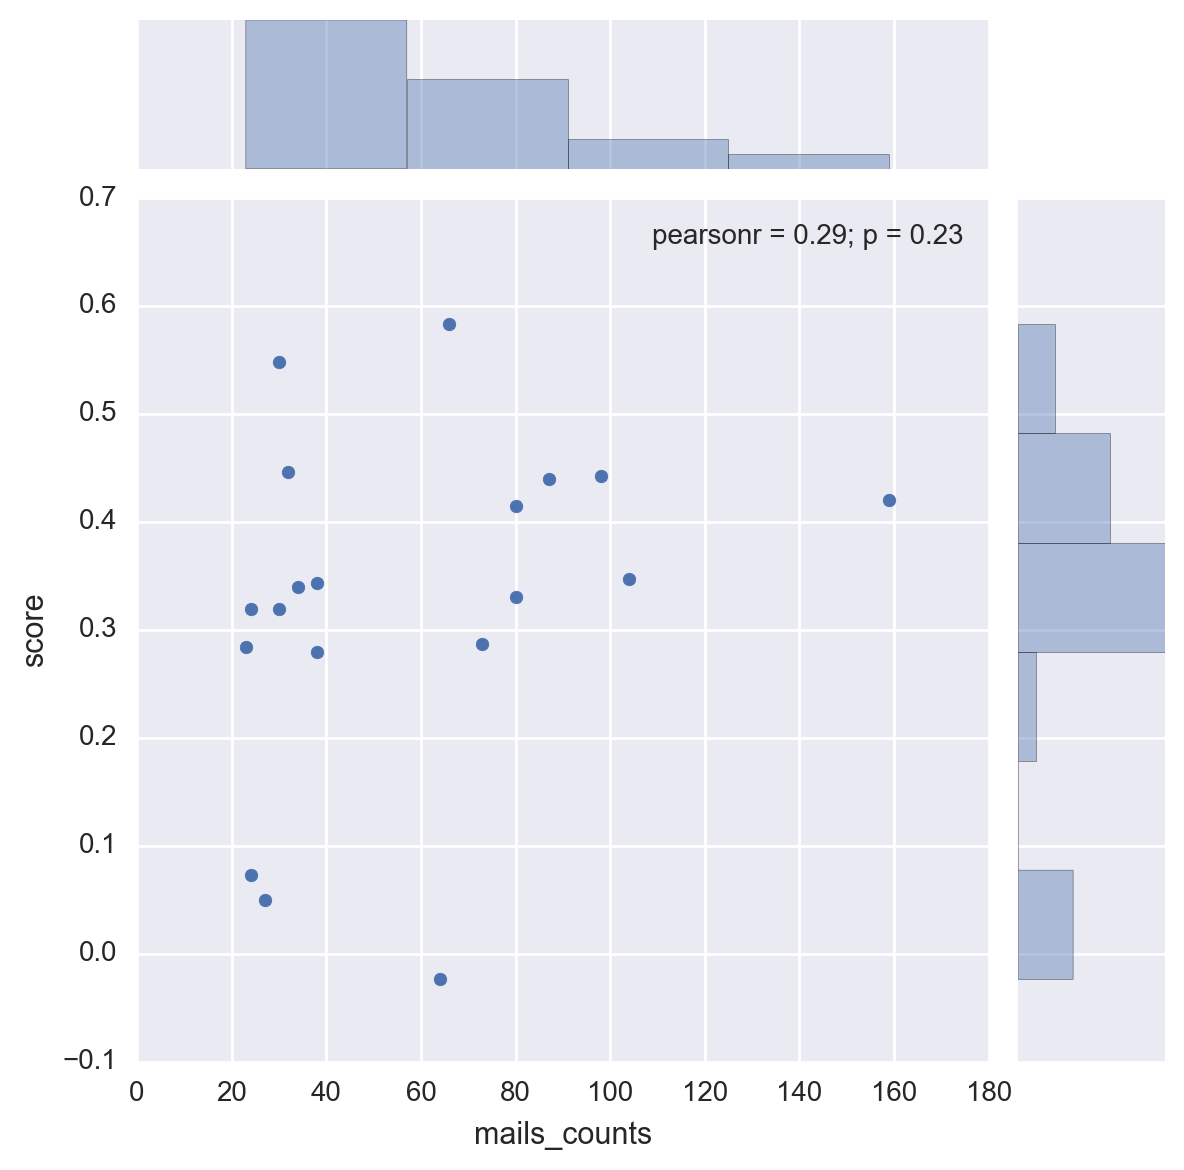

In [19]:
many_emails = mails_country_df.mails_counts > 20
sns.jointplot(mails_country_df[many_emails].mails_counts,
              mails_country_df[many_emails].score);